# Installing PyDrive

In [ ]:
# Authenticate and create the PyDrive client.
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Load Data

Keras Datasets

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Mounting Drive

In [ ]:
from google.colab import drive
import pandas as pd
import zipfile

# Mounting drive, unzip, and read csv
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks/YOLOv6-main"
!pip install -r "requirements.txt"
zip_ref = zipfile.ZipFile('_.zip','r') ; zip_ref.extractall ('./_'); zip_ref.close()
df = pd.read_csv('_.csv','r')

From Github

In [ ]:
# From a GitHub repository
dataset = pd.read_csv("https://raw.githubusercontent.com/hadiforoughi/DataSets/main/houses.csv")
dataset.info()

Upload to Drive

In [ ]:
# Uploading files to drive
from google.colab import files
files.upload()

Download from Drive

In [ ]:
from google.colab import files
!zip -r /content/SavedModel/SavedModel.zip /content/SavedModel
files.download('/content/SavedModel/SavedModel.zip')

From Kaggle

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

# Create the authentication API (kaggle.json) of your profile and upload it to Drive
from google.colab import files ; files.upload()
# Install the Kaggle library
! pip install -q kaggle
# Make a directory named “.kaggle”
! mkdir ~/.kaggle
# 1. Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/
# 2. Copy from mounted Drive
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json
# See the list of datasets
! kaggle datasets list
# 1. Download competitions dataset:
! kaggle competitions download <name-of-competition>
# 2. Download datasets
! kaggle datasets download -d ssarkar445/covid-19-xray-and-ct-scan-image-dataset
# Unzip dataset
! unzip covid-19-xray-and-ct-scan-image-dataset.zip -d dataset

# Load and Save Model

In [ ]:
!pip install pyyaml h5py
from keras.models import load_model

# Loading the whole model
model = load_model('./SavedModel/C01_MLP.h5')
# Loading the pre-trained weights
model.load_weights('./SavedModel/C01_MLP_Checkpoint')

# Saving the whole model
model.save('./SavedModel/C01_MLP.h5')
# Saving the trained weights
model.save_weights('./SavedModel/C01_MLP_Checkpoint')

# Preprocess (Mnist Dataset)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9] 



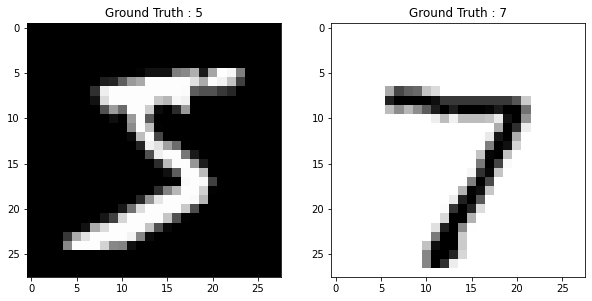

In [ ]:
# Checkout the Data
print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)
 
# Find the unique numbers from the train labels
import numpy as np
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes,'\n')
 
# Display the first image in training and testing data
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.imshow(x_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))
plt.subplot(122)
plt.imshow(x_test[0,:,:], cmap='binary')
plt.title("Ground Truth : {}".format(y_test[0]))

# Flattening the data: Change from matrix of dimension 28x28 to array of dimention 784
X_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) #(60000, 784)
X_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))     #(10000, 784)

# Change to float datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Noramlization from [0;255] to [0;1], Scale the data to lie between 0 to 1
X_train /= 255 ; X_test /= 255

# Convert labels to one-hot vectors
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

# Preprocess (House Prices)

The "sqft_living" has maximum correlation with price, the correlation value is: 0.7020350546118005
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `date = pd.to_datetime(dataset['date'])'
/bin/bash: dataset[year]: command not found
/bin/bash: dataset[month]: command not found
/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `dataset = dataset.drop(columns=['date'])'


<Figure size 432x288 with 0 Axes>

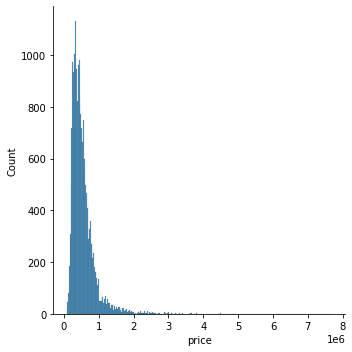

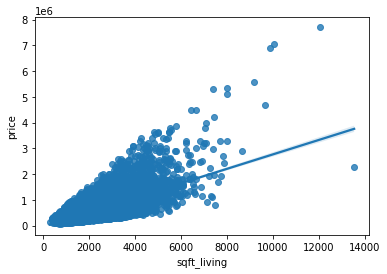

In [ ]:
# Finding the number of NaN elements in each column
dataset.isna().sum()

# Correlation matrix of the data (assuming each column as a feature)
corr_matrix = dataset.corr()

# Which feature has the most correlation with price?
max_price_corr = corr_matrix["price"].drop(index=["price"]) # Correlations of price with all features except the price itself
max_corr_feature = max_price_corr.idxmax() ; max_corr_value = max_price_corr.max() # The index and the value of the feature with maximum correlation (with price)
print('The "' + max_corr_feature + '" has maximum correlation with price, the correlation value is: ' + str(max_corr_value))

# Histogram of one feature and regression between two features
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(); sns.displot(data=dataset, x="price")
plt.figure(); sns.regplot(data=dataset, x=max_corr_feature, y='price')

# Dividing "date" column into month and year, adding them to features separately, and dropping "date" feature
!date = pd.to_datetime(dataset['date'])
!dataset['year'] = date.dt.year ; dataset['month'] = date.dt.month
!dataset = dataset.drop(columns=['date'])

# Dividing data into train (80%) and test (20%)
from sklearn.model_selection import train_test_split
train,test = train_test_split(dataset, test_size=0.2,shuffle = True, random_state = 0)

# Scaling train data and applying the transform to test set too (test set should not be involved in scaling which would be data leakage)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train) ; train_sc = scaler.transform(train) # It gives output as an array (with no titles)
col_names = train.columns ; train_sc = pd.DataFrame(train_sc, columns = col_names) # Extracting feature names and forming the dataframe again
test_sc = scaler.transform(test) ; test_sc = pd.DataFrame(test_sc, columns = col_names) # Just applying the transform to the test set and forming the dataframe

# Preprocess (Cfar10 Dataset)

In [ ]:
from skimage.transform import resize
from sklearn.preprocessing import MultiLabelBinarizer

one_hot = MultiLabelBinarizer() ; y_train = one_hot.fit_transform(y_train)
one_hot = MultiLabelBinarizer() ; y_test = one_hot.fit_transform(y_test)

imgs_16_16 = []
imgs_8_8 = []
for i in range(x_train.shape[0]):
  imgs_16_16.append(resize(x_train[i], (16, 16)))
  imgs_8_8.append(resize(x_train[i], (8, 8)))
x_train_32_32 = x_train
x_train_16_16 = np.array(imgs_16_16)
x_train_8_8 = np.array(imgs_8_8)

rand_index = []
for i in range(10):
  rand = np.random.randint(x_train.shape[0])
  rand_index.append(rand)

def show_img(index):
  plt.figure() ; plt.subplot(131) ; plt.title("32*32") ; plt.imshow(x_train_32_32[index])
  plt.subplot(132) ; plt.title("16*16") ; plt.imshow(x_train_16_16[index]) ; plt.subplot(133)
  plt.title("8*8") ; plt.imshow(x_train_8_8[index])

imgs_16_16=[] ; imgs_8_8=[]
for i in range(x_train.shape[0]):
  imgs_16_16.append(resize(x_train_16_16[i], (32, 32)))
  imgs_8_8.append(resize(x_train_8_8[i], (32, 32)))
x_train_16 = np.array(imgs_16_16)
x_train_8 = np.array(imgs_8_8)

for i in rand_index:
  show_img(i)

rand_index_test = []
for i in range(10):
  rand = np.random.randint(x_test.shape[0])
  rand_index_test.append(rand)

# Preprocess (Kaggle Covid19 Dataset)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
disease_types=['COVID', 'Non-COVID']
data_dir = './dataset/COVID-19 Dataset/CT/'
train_dir = os.path.join(data_dir)

train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])

train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
SEED = 32
train = train.sample(frac=1, random_state=SEED) 
train.index = np.arange(len(train))     
train.head() ; train.info()

non_cov_num = train[train["DiseaseID"]==1].shape[0]
cov_num = train[train["DiseaseID"]==0].shape[0]
print("number of covid: " + str(cov_num))
print("number of non-covid: " + str(non_cov_num))
print("total number of images: " + str(train.shape[0]))

import cv2
plt.imshow(cv2.imread(os.path.join(data_dir, train['File'][0])))

resize to 64*64 and normalization

In [ ]:
X_train = np.zeros((train.shape[0], 64, 64, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = cv2.imread(os.path.join(data_dir, file))
    if image is not None:
        image64 =  cv2.resize(image.copy(), (64, 64), interpolation=cv2.INTER_AREA)
        X_train[i] = image64 / 255
print('Train Shape: {}'.format(X_Train.shape))

categorical labeling

In [ ]:
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=2)

tarin-test split

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.2)

Data Augmentation

In [ ]:
dataAug = ImageDataGenerator(rotation_range=360, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)
dataAug.fit(X_train)